In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from visual_behavior.data_access import loading as loading

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

In [4]:
import visual_behavior.data_access.utilities as utilities

import visual_behavior.visualization.ophys.platform_paper_figures as ppf

### load experiments_table from cache

In [5]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
# print(cache_dir)

In [6]:
experiments_table = loading.get_platform_paper_experiment_table()
print(len(experiments_table))

1249


### load cells table

In [7]:
cells_table = loading.get_cell_table()
print(len(cells_table.ophys_experiment_id.unique()))

1249


## Filtered Events

In [8]:
use_events = True
filter_events = True

### plot population average across experience levels for Multiscope experiments

TBD: interpolate to average scientifica & multiscope

### all changes

In [9]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change']

# load multi_session_df
trials_change_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_df.ophys_experiment_id.unique()))

# limit to changes
trials_change_df = trials_change_df[(trials_change_df.stimulus_change==True)]

# limit to platform paper dataset
trials_change_df = trials_change_df[trials_change_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_df.ophys_experiment_id.unique()))
# merge with metadata
trials_change_df = trials_change_df.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 32.9 s


In [10]:
# set project code 
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


107


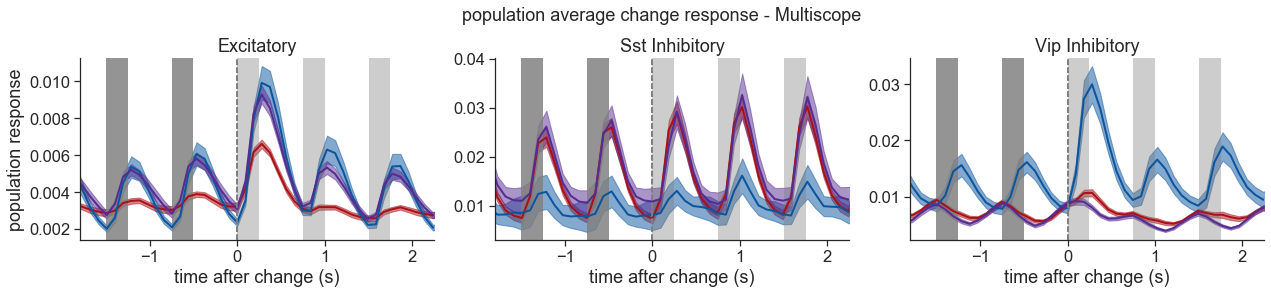

In [11]:
# plot
axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_df[trials_change_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### changes pref stim

In [12]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change', 'change_image_name']

# load multi_session_df
trials_change_pref_stim = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

# limit to changes, pref stim
trials_change_pref_stim = trials_change_pref_stim[(trials_change_pref_stim.stimulus_change==True)&(trials_change_pref_stim.pref_stim==True)]

# limit to platform paper dataset
trials_change_pref_stim = trials_change_pref_stim[trials_change_pref_stim.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))
# merge with metadata
trials_change_pref_stim = trials_change_pref_stim.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 3min 21s


107


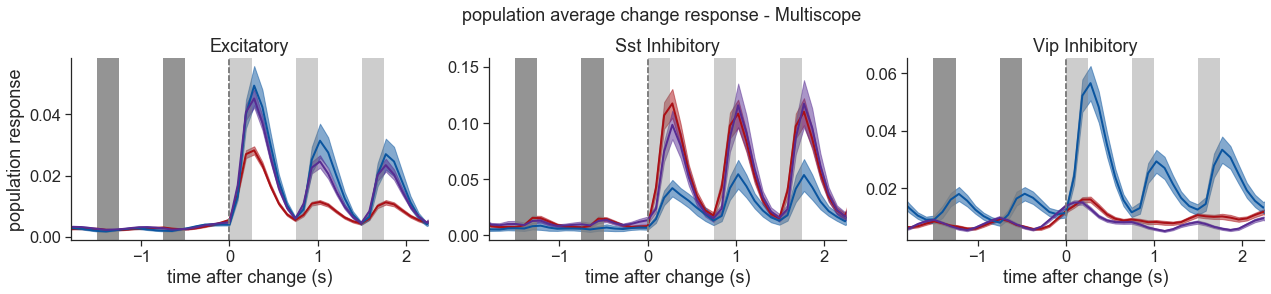

In [13]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_pref_stim[trials_change_pref_stim.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### omissions

In [14]:
%%time

# set various params
df_name = 'omission_response_df'
conditions = ['cell_specimen_id']

# load multi_session_df
omission_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(omission_df.ophys_experiment_id.unique()))

# limit to platform paper dataset
omission_df = omission_df[omission_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(omission_df.ophys_experiment_id.unique()))
# merge with metadata
omission_df = omission_df.merge(experiments_table, on='ophys_experiment_id')
print(len(omission_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 19.4 s


107


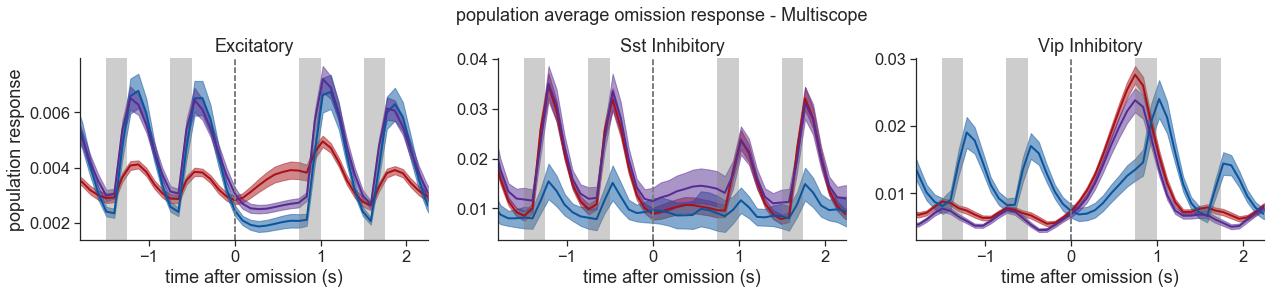

In [15]:
# plot
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = omission_df[omission_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

## dF/F

In [16]:
use_events = False
filter_events = False

### all changes

In [17]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change']

# load multi_session_df
trials_change_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_df.ophys_experiment_id.unique()))

# limit to changes
trials_change_df = trials_change_df[(trials_change_df.stimulus_change==True)]

# limit to platform paper dataset
trials_change_df = trials_change_df[trials_change_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_df.ophys_experiment_id.unique()))
# merge with metadata
trials_change_df = trials_change_df.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 47.5 s


In [18]:
# set project code 
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

107


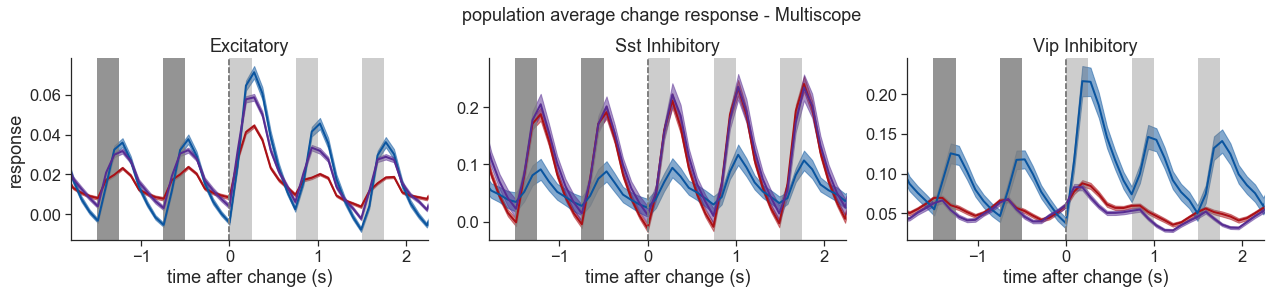

In [19]:
# plot
axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_df[trials_change_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### all changes pref stim

In [20]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change', 'change_image_name']

# load multi_session_df
trials_change_pref_stim = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

# limit to changes, pref stim
trials_change_pref_stim = trials_change_pref_stim[(trials_change_pref_stim.stimulus_change==True)&(trials_change_pref_stim.pref_stim==True)]

# limit to platform paper dataset
trials_change_pref_stim = trials_change_pref_stim[trials_change_pref_stim.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))
# merge with metadata
trials_change_pref_stim = trials_change_pref_stim.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 3min 52s


107


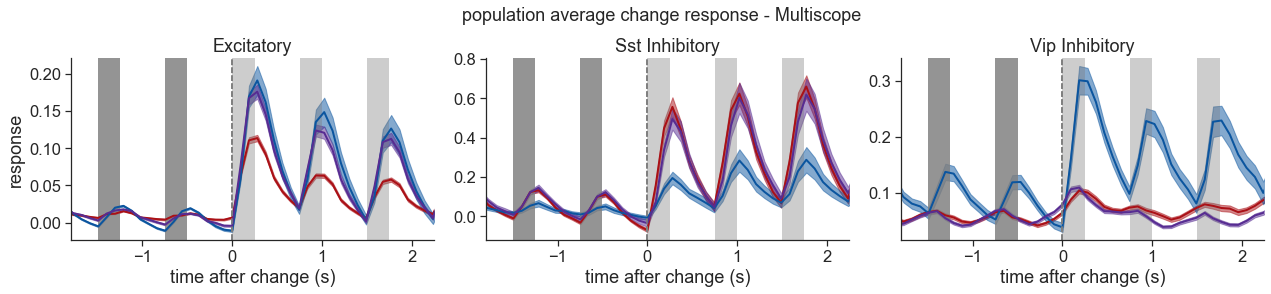

In [21]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_pref_stim[trials_change_pref_stim.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### omissions

In [22]:
%%time

# set various params
df_name = 'omission_response_df'
conditions = ['cell_specimen_id']

# load multi_session_df
omission_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(omission_df.ophys_experiment_id.unique()))

# limit to platform paper dataset
omission_df = omission_df[omission_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(omission_df.ophys_experiment_id.unique()))
# merge with metadata
omission_df = omission_df.merge(experiments_table, on='ophys_experiment_id')
print(len(omission_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 25.2 s


107


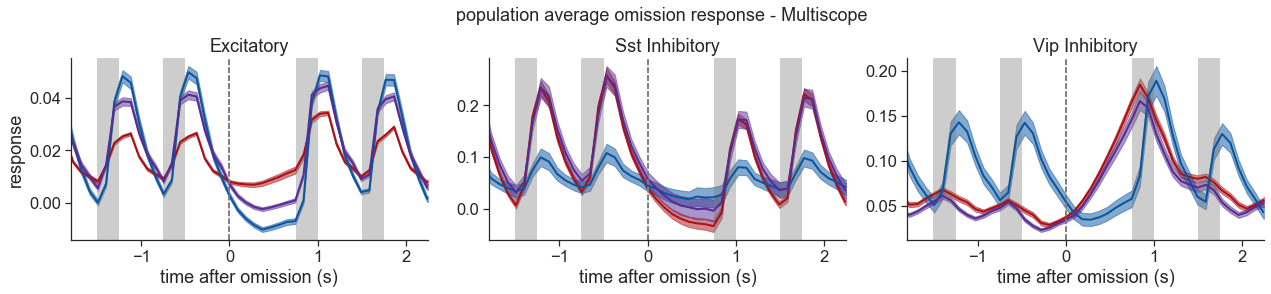

In [23]:
# plot
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = omission_df[omission_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

## events

In [24]:
use_events = True
filter_events = False

### all changes

In [25]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change']

# load multi_session_df
trials_change_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_df.ophys_experiment_id.unique()))

# limit to changes
trials_change_df = trials_change_df[(trials_change_df.stimulus_change==True)]

# limit to platform paper dataset
trials_change_df = trials_change_df[trials_change_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_df.ophys_experiment_id.unique()))
# merge with metadata
trials_change_df = trials_change_df.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 32 s


In [26]:
# set project code 
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

107


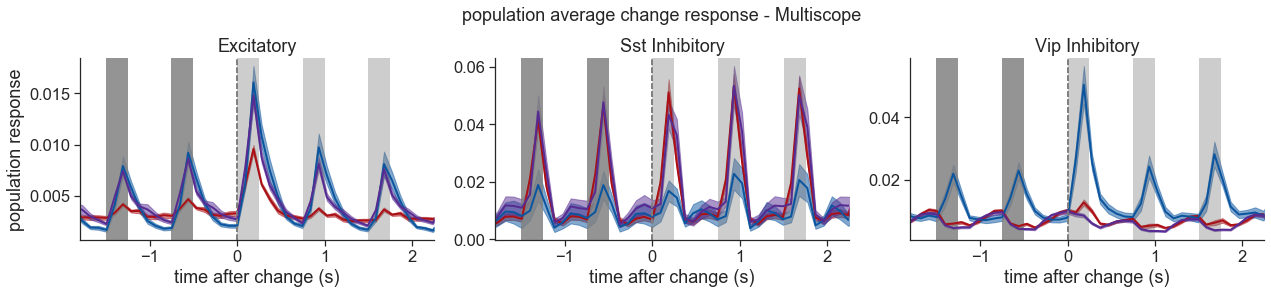

In [27]:
# plot
axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_df[trials_change_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### all changes pref stim

In [28]:
%%time

# set various params
df_name = 'trials_response_df'
conditions = ['cell_specimen_id', 'stimulus_change', 'change_image_name']

# load multi_session_df
trials_change_pref_stim = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

# limit to changes, pref stim
trials_change_pref_stim = trials_change_pref_stim[(trials_change_pref_stim.stimulus_change==True)&(trials_change_pref_stim.pref_stim==True)]

# limit to platform paper dataset
trials_change_pref_stim = trials_change_pref_stim[trials_change_pref_stim.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))
# merge with metadata
trials_change_pref_stim = trials_change_pref_stim.merge(experiments_table, on='ophys_experiment_id')
print(len(trials_change_pref_stim.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 3min 16s


107


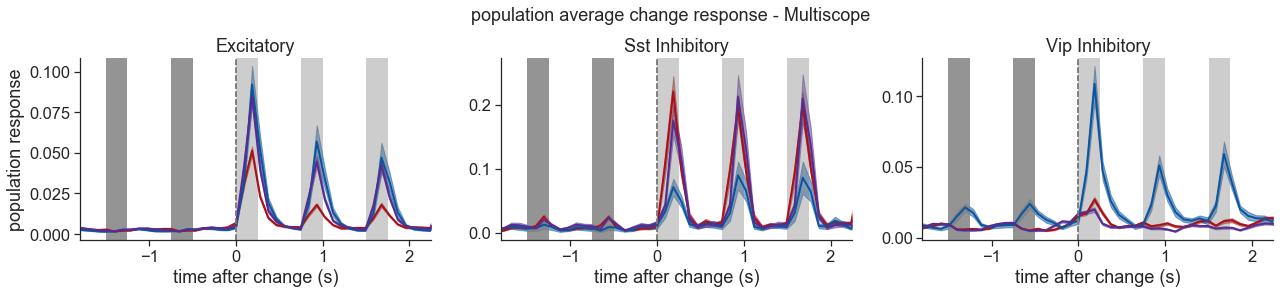

In [29]:
# plot
project_code = 'VisualBehaviorMultiscope'
# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = trials_change_pref_stim[trials_change_pref_stim.project_code==project_code]
# df = df[df.experience_level!='Novel >1']
df = df[df.pref_stim==True]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

## omissions

In [30]:
%%time

# set various params
df_name = 'omission_response_df'
conditions = ['cell_specimen_id']

# load multi_session_df
omission_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments_table, 
                                                use_events=use_events, filter_events=filter_events)
print(len(omission_df.ophys_experiment_id.unique()))

# limit to platform paper dataset
omission_df = omission_df[omission_df.ophys_experiment_id.isin(experiments_table.index.values)]
print(len(omission_df.ophys_experiment_id.unique()))
# merge with metadata
omission_df = omission_df.merge(experiments_table, on='ophys_experiment_id')
print(len(omission_df.ophys_experiment_id.unique()))

1941
1249
1249
Wall time: 21.2 s


107


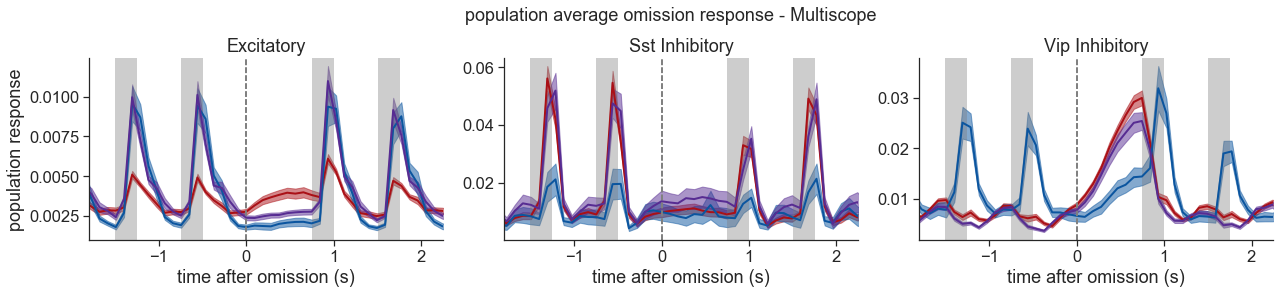

In [31]:
# plot
project_code = 'VisualBehaviorMultiscope'

# get timestamps 
multiscope_expt = experiments_table[experiments_table.project_code==project_code].index.values[9] 
timestamps = ppf.get_timestamps_for_response_df_type(cache, multiscope_expt, df_name)

axes_column = 'cell_type'
hue_column = 'experience_level'
palette = utilities.get_experience_level_colors()
xlim_seconds = [-1.8,2.25]

df = omission_df[omission_df.project_code==project_code]
# df = df[df.experience_level!='Novel >1']

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### plot population average with exposure number 

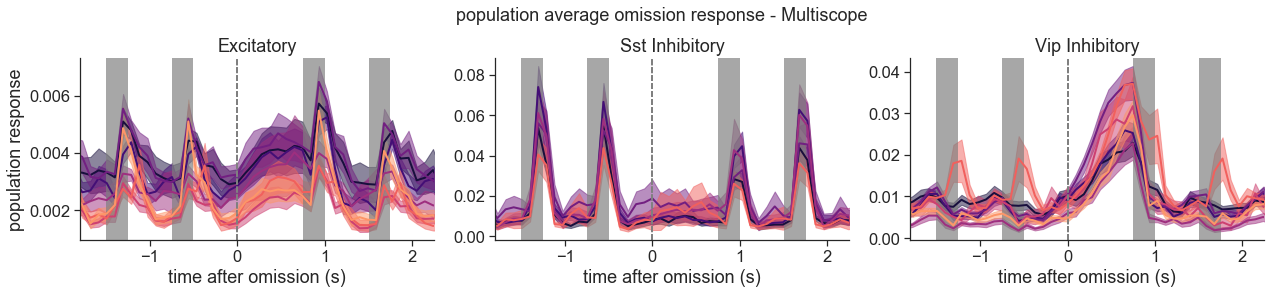

In [33]:
hue_column = 'prior_exposures_to_omissions'
axes_column= 'cell_type'
palette = sns.color_palette('magma',8)
xlim_seconds = [-1.8,2.25]

df = omission_df.copy()
df = df[df.experience_level=='Familiar']
df = df[df.prior_exposures_to_omissions<=6]

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### plot population average across cell types

In [35]:
import visual_behavior.visualization.utils as utils

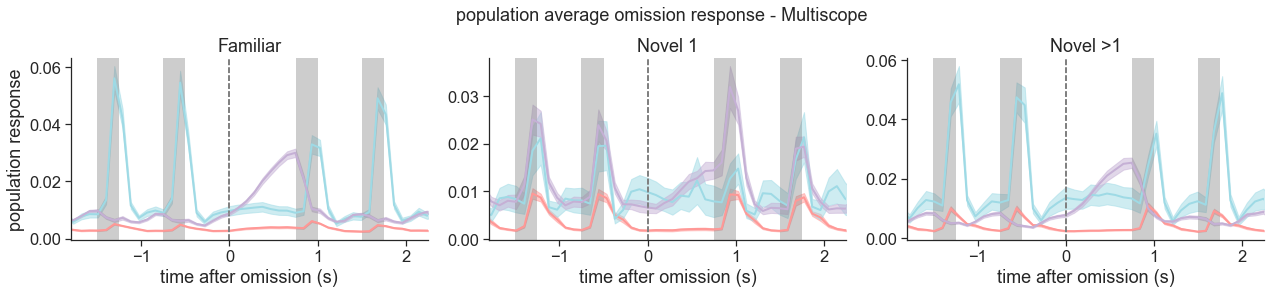

In [38]:
axes_column = 'experience_level'
hue_column = 'cell_type'
palette = utils.get_cre_line_colors()
xlim_seconds = [-1.8,2.25]

df = omission_df.copy()

ppf.plot_population_averages_for_conditions(df, df_name, timestamps, 
                                            axes_column, hue_column, project_code=project_code,
                                            use_events=use_events, filter_events=filter_events, 
                                            xlim_seconds=xlim_seconds, palette=palette,
                                            horizontal=True, save_dir=None, folder=None)

### plot cell response heatmaps

3 3


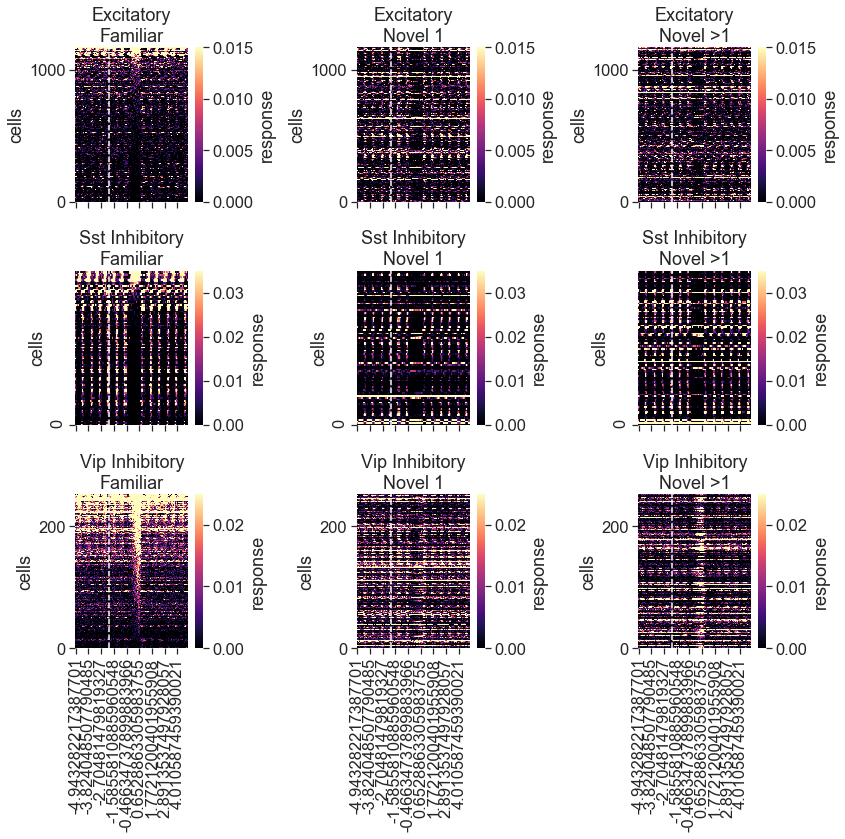

In [46]:
sdf = omission_df.copy()
sdf = utilities.limit_to_last_familiar_second_novel_active(sdf)
sdf = utilities.limit_to_cell_specimen_ids_matched_in_all_experience_levels(sdf)

row_condition = 'cell_type'
col_condition = 'experience_level'
# xlim_seconds = [(3-1.8)*11,(3+2.25)*11]
xlim_seconds = None

ppf.plot_response_heatmaps_for_conditions(sdf, df_name, timestamps,
                                        row_condition, col_condition, use_events, filter_events, project_code=project_code,
                                        microscope='Multiscope', vmax=0.04, xlim_seconds=xlim_seconds, 
                                        match_cells=True, save_dir=None, folder=None)